# First exploration into space using Python :)

#### Import astropy and astroML packages

In [1]:
import astropy
import astroML

#package for obtaining space co-ordinates
from astropy.coordinates import SkyCoord

#package for using FITS images in Jupyter Notebooks
from astropy.io import fits

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

%matplotlib inline

In [2]:
coordinates = SkyCoord.from_name('M87')
coordinates

<SkyCoord (ICRS): (ra, dec) in deg
    (187.70593076, 12.39112329)>

In [3]:
coordinates1 = SkyCoord.from_name('Horsehead Nebula')
coordinates1

<SkyCoord (ICRS): (ra, dec) in deg
    (85.24583, -2.45833)>

#### Upload the FITS images for the coordinates from SkyView images
#### Copyright of NASA images

##### fits.getheader gives information about the SkyView parameter capture images
##### fits.getheader returns an object of class of astropy.io.fits.header

In [4]:
M87_filename = "skv2144469622794.fits"
fits.getheader(M87_filename)

SIMPLE  =                    T / Written by SkyView Sun Feb 03 08:05:30 EST 2019
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  300 / Width of image                                 
NAXIS2  =                  300 / Height of image                                
CRVAL1  =         187.70593076 / Reference longitude                            
CRVAL2  =          12.39112329 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                150.5 / X reference pixel                              
CRPIX2  =                150

In [5]:
HHN_filename = 'skv5940390548763.fits'
fits.getheader(HHN_filename)

SIMPLE  =                    T / Written by SkyView Sun Feb 03 08:09:30 EST 2019
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  300 / Width of image                                 
NAXIS2  =                  300 / Height of image                                
CRVAL1  =             85.24583 / Reference longitude                            
CRVAL2  =             -2.45833 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                150.5 / X reference pixel                              
CRPIX2  =                150

# Opening fits image file and importing data into variable and header info

#### Header returns a HDUL object in this method

In [6]:
M87_file = fits.open(M87_filename)
M87_file.info()

Filename: skv2144469622794.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     166   (300, 300)   float32   


####  Image information is in Primary block accessed through index 0

In [7]:
M87_data = M87_file[0].data

##### Convert information from fits file into a numpy array

In [8]:
print(type(M87_data))
M87_data.shape

<class 'numpy.ndarray'>


(300, 300)

In [9]:
M87_file.close()

In [10]:
HHN_file = fits.open(HHN_filename)
HHN_file.info()

Filename: skv5940390548763.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     173   (300, 300)   float32   


In [11]:
HHN_data = HHN_file[0].data

In [12]:
HHN_file.close()

# Image data available as Numpy arrays in M87_data and HHN_data

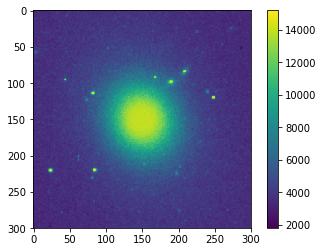

In [13]:
fig = plt.imshow(M87_data, cmap='viridis')
plt.colorbar()

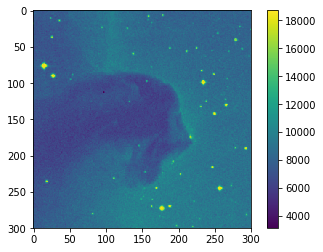

In [14]:
plt.imshow(HHN_data, cmap='viridis')
plt.colorbar()

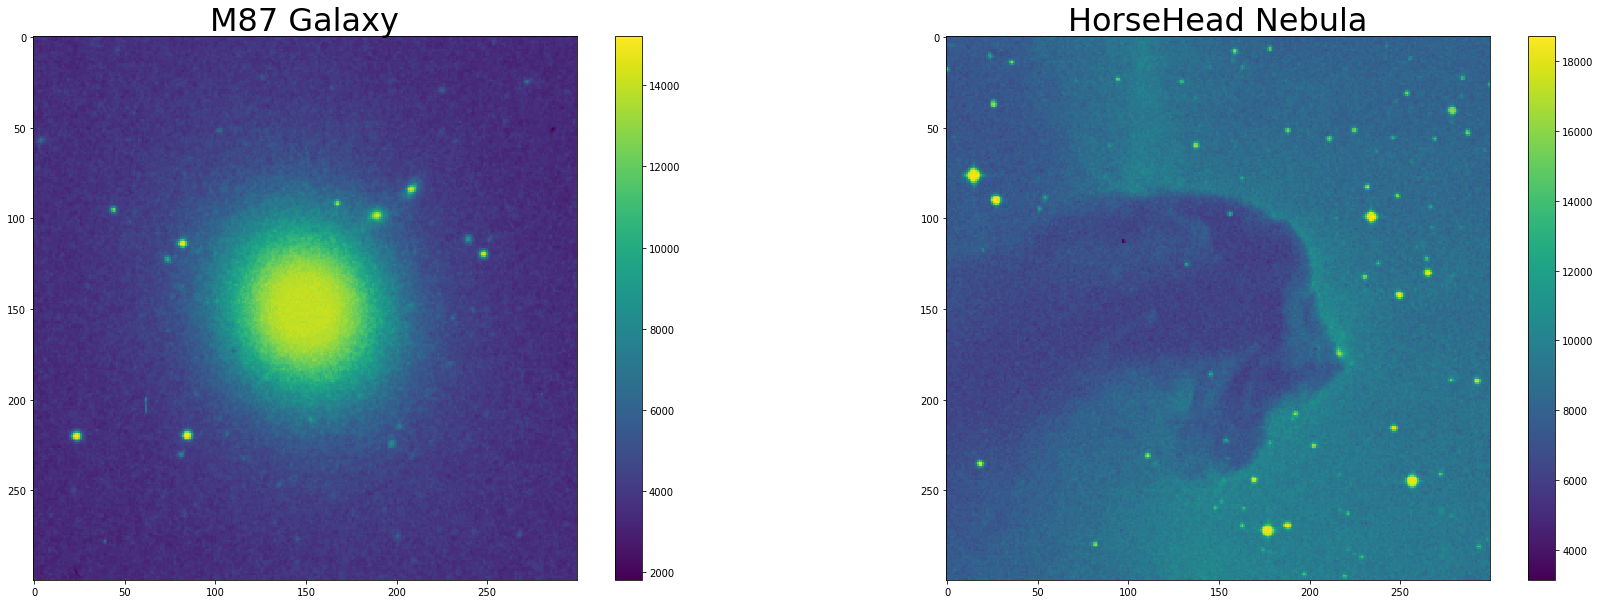

In [15]:
fig, ax = plt.subplots(1,2, figsize = (30,10))
im1 = ax[0].imshow(M87_data, cmap='viridis')
ax[0].set_title("M87 Galaxy", fontsize=32)
im2 = ax[1].imshow(HHN_data, cmap='viridis')
ax[1].set_title("HorseHead Nebula", fontsize=32)
plt.colorbar(im1, ax= ax[0])
plt.colorbar(im2, ax= ax[1])

#### Image statistics and related information

#### M87 Galaxy information

In [16]:
print('Min: ', np.min(M87_data))
print('Max: ', np.max(M87_data))
print('Mean: ', np.mean(M87_data))

Min:  1814.0
Max:  15208.0
Mean:  4867.946


#### HorseHead Nebula information

In [17]:
print('Min: ', np.min(HHN_data))
print('Max: ', np.max(HHN_data))
print('Mean: ', np.mean(HHN_data))

Min:  3133.0
Max:  18721.0
Mean:  8263.159


#### Convert Numpy 2D array to 1D array to plot a histogram

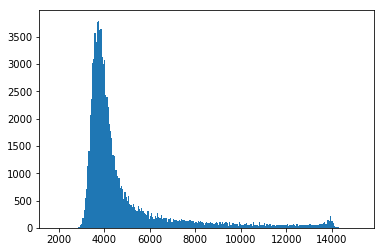

In [18]:
M87_hist= plt.hist(M87_data.flatten(),bins='auto')

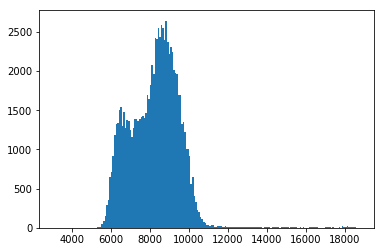

In [19]:
HHN_hist= plt.hist(HHN_data.flatten(),bins ='auto')

## Comparison of histograms of M87 Galaxy and Horsehead Nebula

Text(0.5,1,'Horsehead Nebula Histogram')

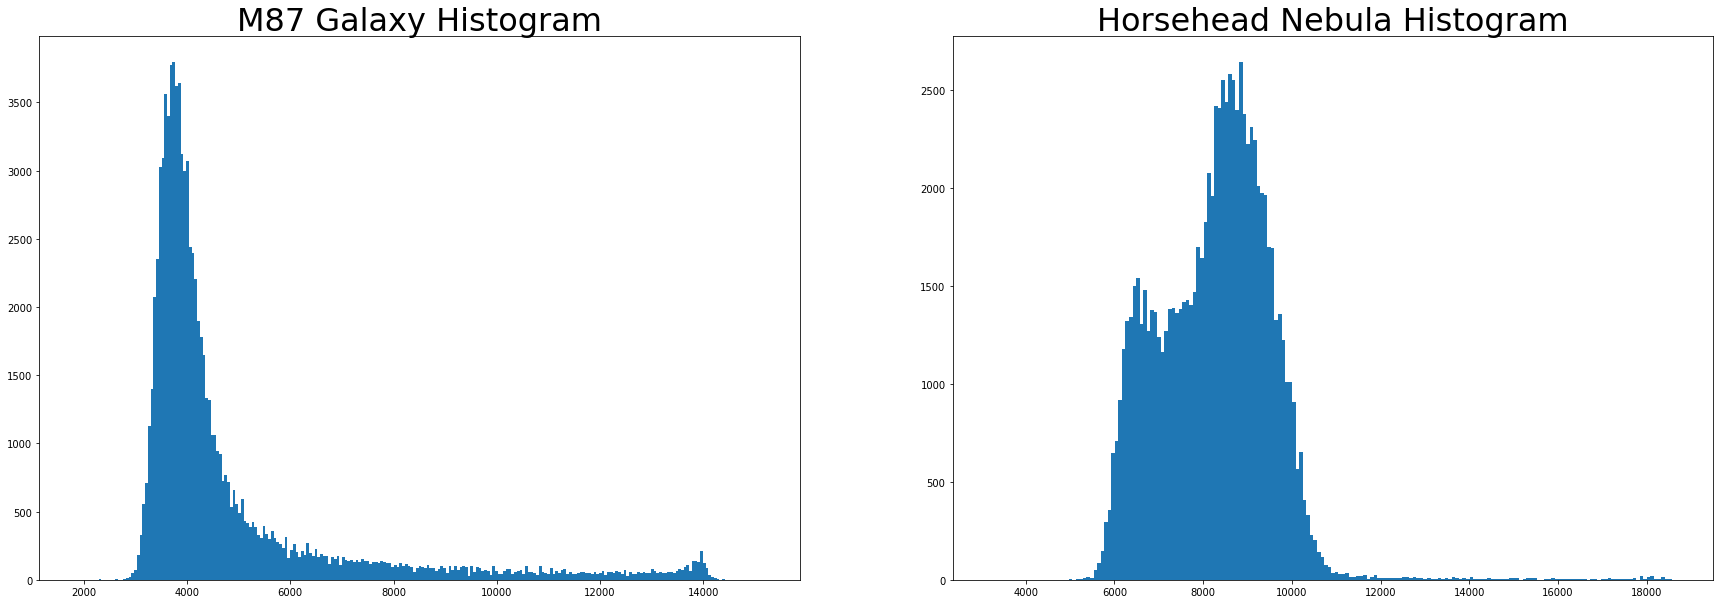

In [20]:
figs , axes = plt.subplots(1,2, figsize =(30,10))
axes[0].hist(M87_data.flatten(),bins='auto')
axes[0].set_title("M87 Galaxy Histogram", fontsize=32)
axes[1].hist(HHN_data.flatten(),bins='auto')
axes[1].set_title("Horsehead Nebula Histogram", fontsize=32)

### LogNorm display of the image for better visualization

In [21]:
from matplotlib.colors import LogNorm

[Text(1,0,'0'), Text(1,0,'8,500')]

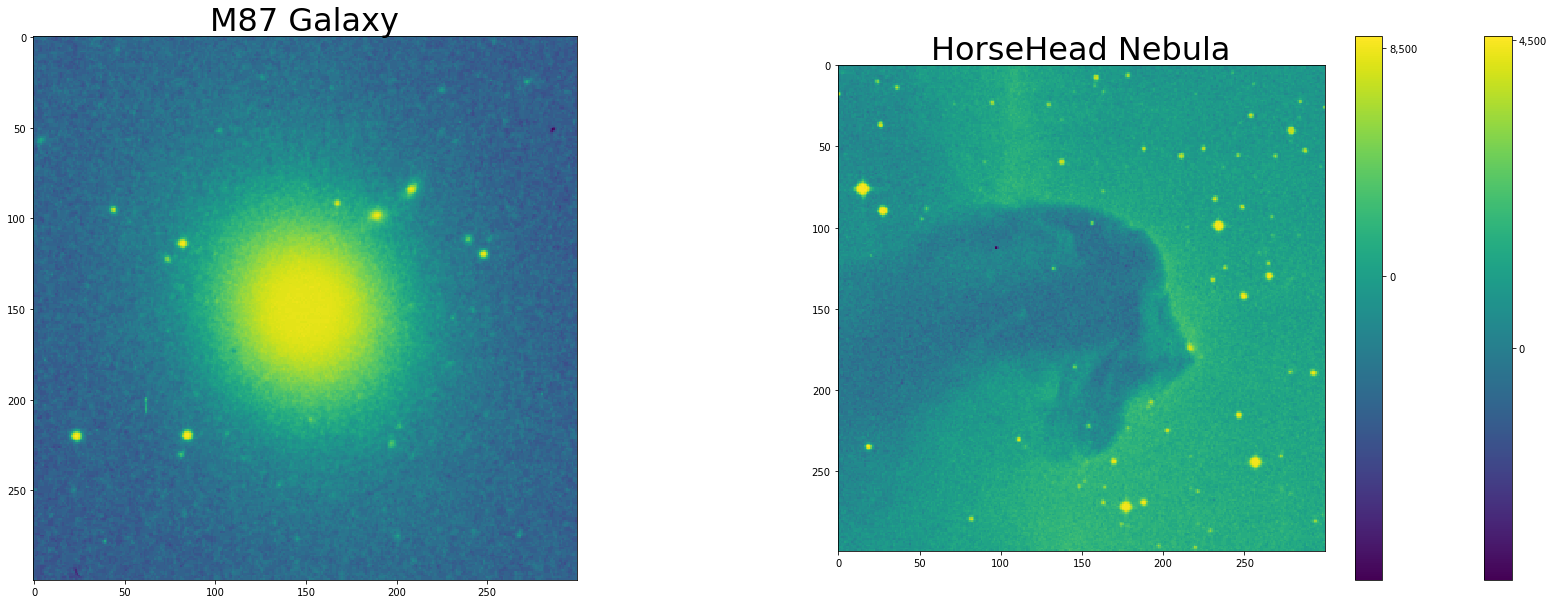

In [25]:
figures, axis = plt.subplots(1,2, figsize = (30,10))
im11 = axis[0].imshow(M87_data, cmap='viridis', norm = LogNorm())
axis[0].set_title("M87 Galaxy", fontsize=32)
cbar = plt.colorbar(im11, ticks =[0,4500,15000])
cbar.ax.set_yticklabels(['0','4,500','15000'])

im21 = axis[1].imshow(HHN_data, cmap='viridis', norm = LogNorm())
axis[1].set_title("HorseHead Nebula", fontsize=32)
cbar1 = plt.colorbar(im21, ticks =[0,8500,18000])
cbar1.ax.set_yticklabels(['0','8,500','18000'])